In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [19]:
# Set style for better visualizations
plt.style.use('ggplot')

In [20]:
# Read the dataset
df = pd.read_csv('StudentsPerformance.csv')

In [21]:
# Display shape
print("\nDataset Shape:")
print(df.shape)


Dataset Shape:
(1000, 8)


In [22]:
# Display info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [23]:
# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   
mean       NaN            NaN                         NaN       NaN   
std        NaN            NaN                         NaN       NaN   
min        NaN            NaN                         NaN       NaN   
25%        NaN            NaN                         NaN       NaN   
50%        NaN            NaN                         NaN       NaN   
75%        NaN            NaN                         NaN       NaN   
max        NaN            NaN                         NaN       NaN   

       test preparation course  math score  reading score  writing score  
count                     1000  1000.00000    1

In [24]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [25]:
# Calculate total and average scores
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3

In [26]:
# Create performance categories
df['performance_category'] = pd.cut(df['average_score'], 
                                    bins=[0, 40, 60, 75, 90, 100],
                                    labels=['Poor', 'Below Average', 'Average', 'Good', 'Excellent'])

In [27]:
# Sort by average score
df.sort_values(by=['average_score'], ascending=False, inplace=True)
df = df.reset_index(drop=True)

In [29]:
# Display top performers
print("\nTop 10 Performing Students:")
df.head(10)


Top 10 Performing Students:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score,performance_category
0,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000,Excellent
1,female,group E,associate's degree,standard,none,100,100,100,300,100.000000,Excellent
2,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000,Excellent
3,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667,Excellent
4,female,group D,some college,standard,none,98,100,99,297,99.000000,Excellent
5,female,group D,some high school,standard,completed,97,100,100,297,99.000000,Excellent
6,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667,Excellent
7,male,group D,some college,standard,completed,100,97,99,296,98.666667,Excellent
8,female,group E,master's degree,standard,completed,94,99,100,293,97.666667,Excellent
9,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293,97.666667,Excellent


In [30]:
# Identify students with scores below passing grade (60 is passing)
low_performers = df[df['average_score'] < 60]
print("\nNumber of students below 60 average:", len(low_performers))


Number of students below 60 average: 285


In [31]:
# Reset index for low performers
low_performers = low_performers.reset_index(drop=True)
print("\nStudents with lowest performance:")
print(low_performers.head())


Students with lowest performance:
   gender race/ethnicity parental level of education     lunch  \
0  female        group C           bachelor's degree  standard   
1  female        group B                 high school  standard   
2  female        group D                 high school  standard   
3  female        group D                 high school  standard   
4  female        group A            some high school  standard   

  test preparation course  math score  reading score  writing score  \
0               completed          52             61             66   
1                    none          58             62             59   
2                    none          51             66             62   
3               completed          57             58             64   
4                    none          48             66             65   

   total_score  average_score performance_category  
0          179      59.666667        Below Average  
1          179      59.666667      

In [34]:
# Calculate and display average scores by various categories
print("\nAverage scores by gender:")
print(df.groupby('gender')['average_score'].mean())

print("\nAverage scores by lunch type:")
print(df.groupby('lunch')['average_score'].mean())

print("\nAverage scores by test preparation:")
print(df.groupby('test preparation course')['average_score'].mean())

print("\nAverage scores by parental education:")
print(df.groupby('parental level of education')['average_score'].mean())


Average scores by gender:
gender
female    69.569498
male      65.837483
Name: average_score, dtype: float64

Average scores by lunch type:
lunch
free/reduced    62.199061
standard        70.837209
Name: average_score, dtype: float64

Average scores by test preparation:
test preparation course
completed    72.669460
none         65.038941
Name: average_score, dtype: float64

Average scores by parental education:
parental level of education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: average_score, dtype: float64


In [35]:
# Define high achievers (students with scores above 90 in all subjects)
high_achievers = df[
    (df['math score'] >= 90) & 
    (df['reading score'] >= 90) & 
    (df['writing score'] >= 90)
].sort_values('average_score', ascending=False)

In [36]:
print("\nHigh Achievers Analysis:")
high_achievers


High Achievers Analysis:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score,performance_category
0,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000,Excellent
1,female,group E,associate's degree,standard,none,100,100,100,300,100.000000,Excellent
2,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000,Excellent
3,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667,Excellent
4,female,group D,some college,standard,none,98,100,99,297,99.000000,Excellent
5,female,group D,some high school,standard,completed,97,100,100,297,99.000000,Excellent
6,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667,Excellent
7,male,group D,some college,standard,completed,100,97,99,296,98.666667,Excellent
8,female,group E,master's degree,standard,completed,94,99,100,293,97.666667,Excellent
9,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293,97.666667,Excellent


In [37]:
print("\nHigh Achievers by Test Preparation:")
print(high_achievers['test preparation course'].value_counts())


High Achievers by Test Preparation:
test preparation course
completed    17
none         11
Name: count, dtype: int64


In [38]:
print("\nHigh Achievers by Parental Education:")
print(high_achievers['parental level of education'].value_counts())


High Achievers by Parental Education:
parental level of education
bachelor's degree     11
associate's degree     7
some college           4
master's degree        3
some high school       2
high school            1
Name: count, dtype: int64


# Visualizations

### 1. Score distribution by categories

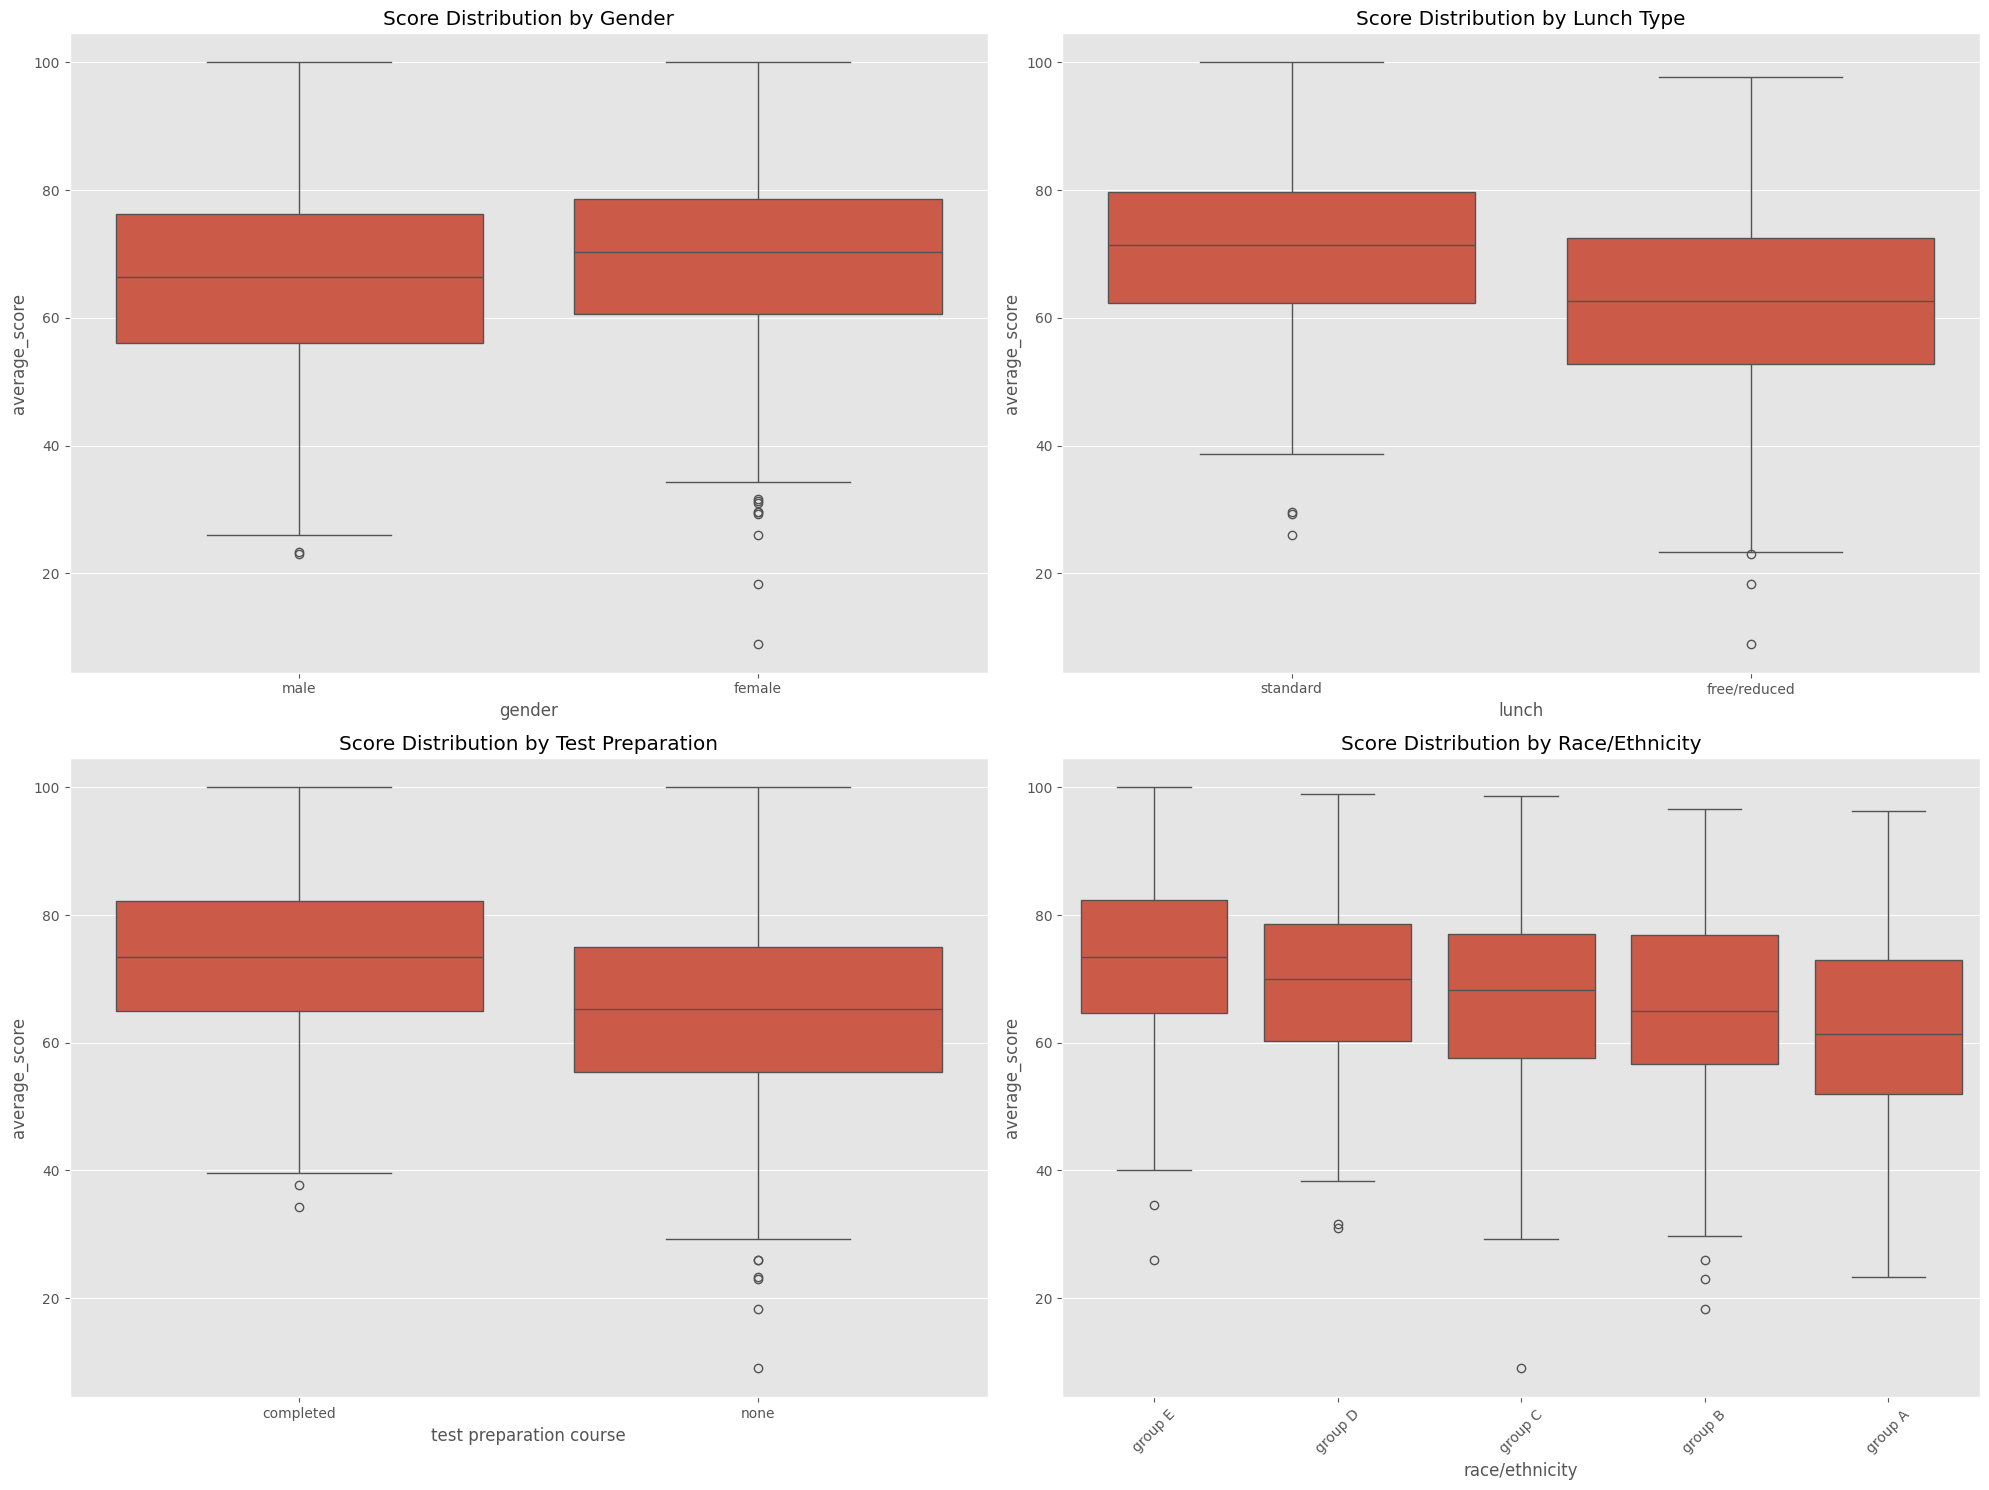

In [43]:
plt.figure(figsize=[20, 15])

plt.subplot(2, 2, 1)
sns.boxplot(x='gender', y='average_score', data=df)
plt.title('Score Distribution by Gender')

plt.subplot(2, 2, 2)
sns.boxplot(x='lunch', y='average_score', data=df)
plt.title('Score Distribution by Lunch Type')

plt.subplot(2, 2, 3)
sns.boxplot(x='test preparation course', y='average_score', data=df)
plt.title('Score Distribution by Test Preparation')

plt.subplot(2, 2, 4)
sns.boxplot(x='race/ethnicity', y='average_score', data=df)
plt.xticks(rotation=45)
plt.title('Score Distribution by Race/Ethnicity')

plt.tight_layout()
plt.show()

### 2. Score distribution for each subject

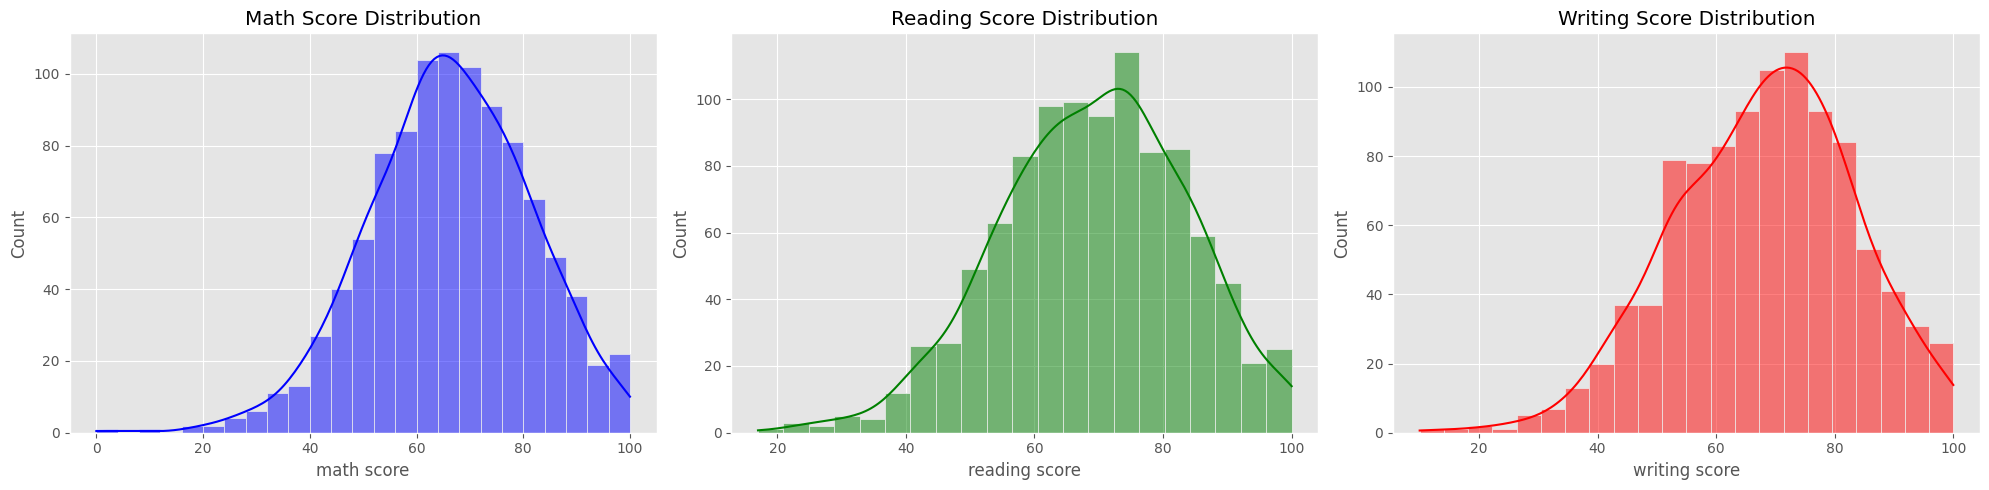

In [41]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True, color='blue')
plt.title('Math Score Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True, color='green')
plt.title('Reading Score Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True, color='red')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

### 3. Correlation heatmap

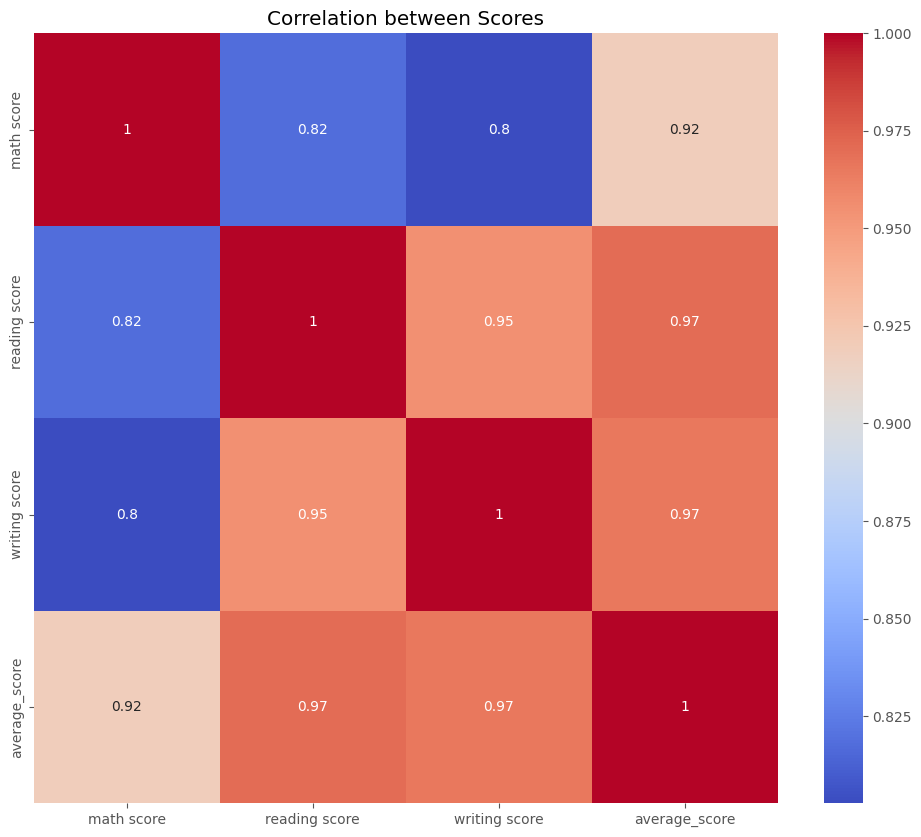

In [42]:
correlation_matrix = df[['math score', 'reading score', 'writing score', 'average_score']].corr()
plt.figure(figsize=[12, 10])
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Scores')
plt.show()

### 4. Parental Education Impact

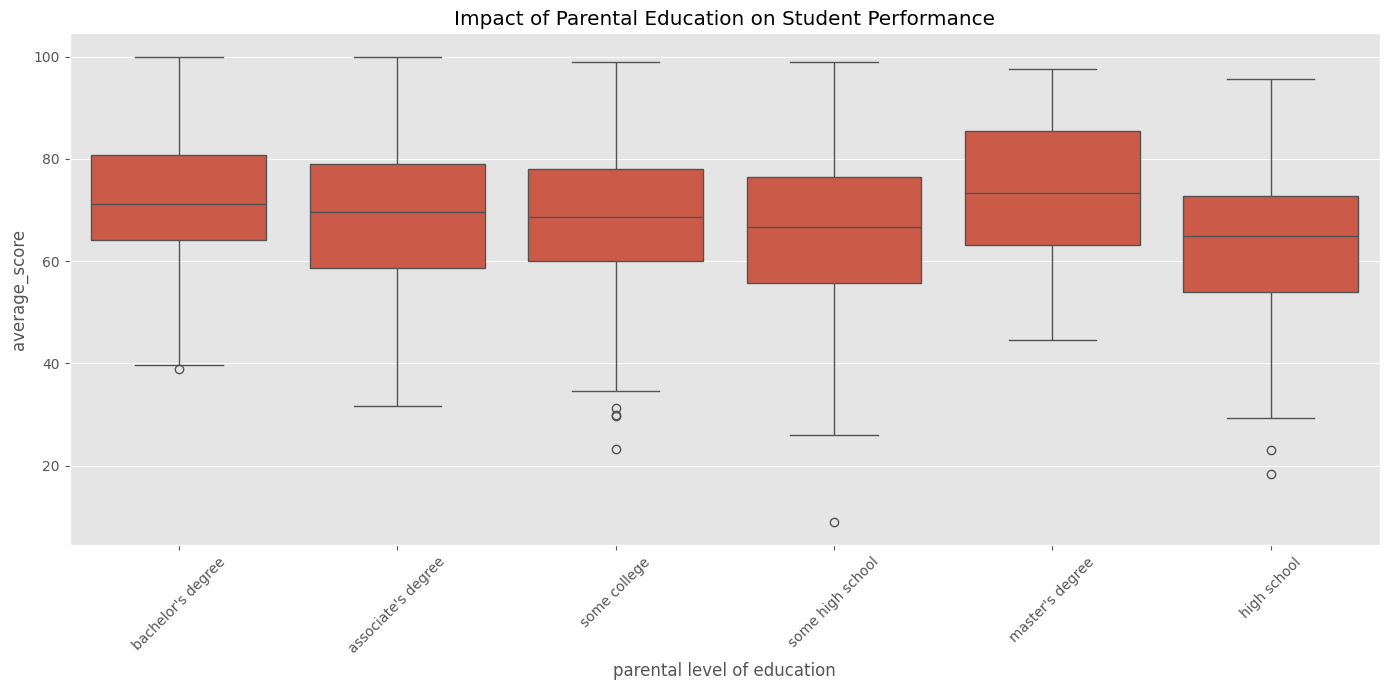

In [44]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='parental level of education', y='average_score', data=df)
plt.title('Impact of Parental Education on Student Performance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Test Preparation Impact

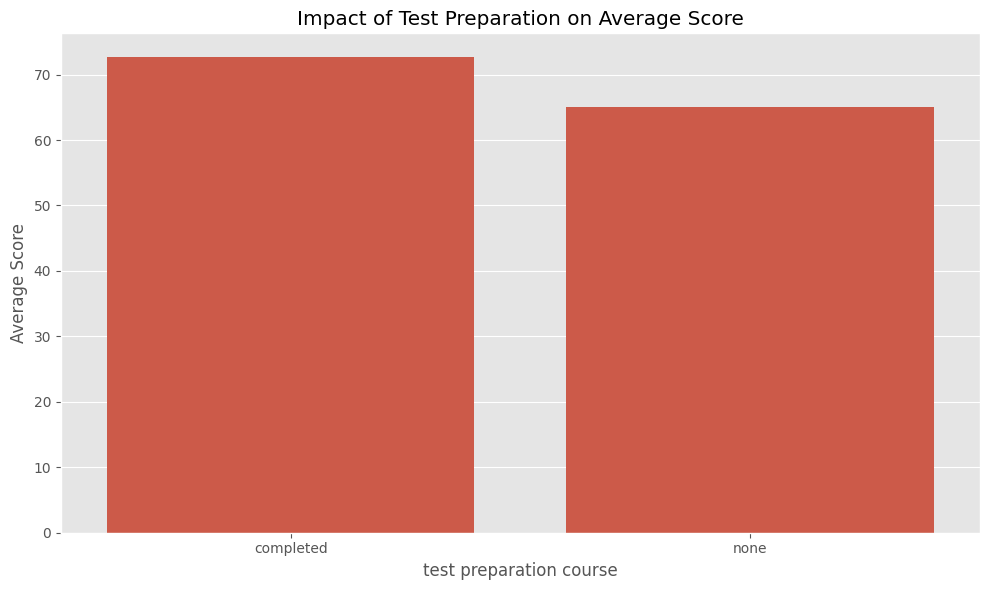

In [45]:
prep_impact = df.groupby('test preparation course')['average_score'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='test preparation course', y='average_score', data=prep_impact)
plt.title('Impact of Test Preparation on Average Score')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

### 6. Gender-wise Subject Performance

In [46]:
subjects = ['math score', 'reading score', 'writing score']
gender_performance = df.groupby('gender')[subjects].mean().reset_index()
gender_performance_melted = pd.melt(gender_performance, id_vars=['gender'], value_vars=subjects, var_name='subject', value_name='score')

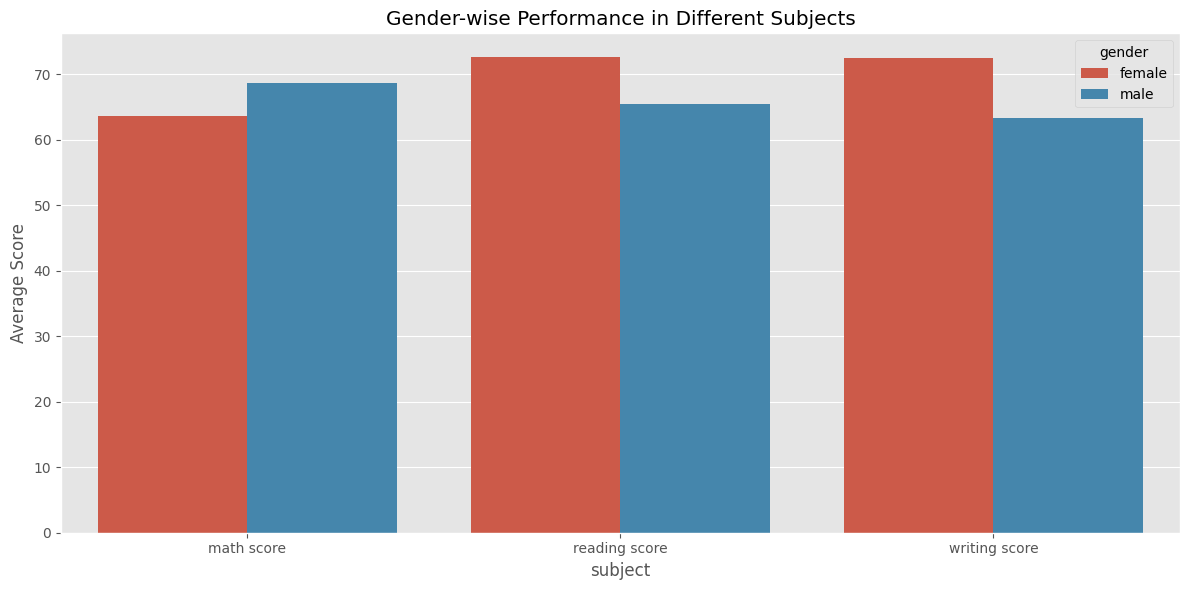

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x='subject', y='score', hue='gender', data=gender_performance_melted)
plt.title('Gender-wise Performance in Different Subjects')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

### 7. Distribution of Total Scores

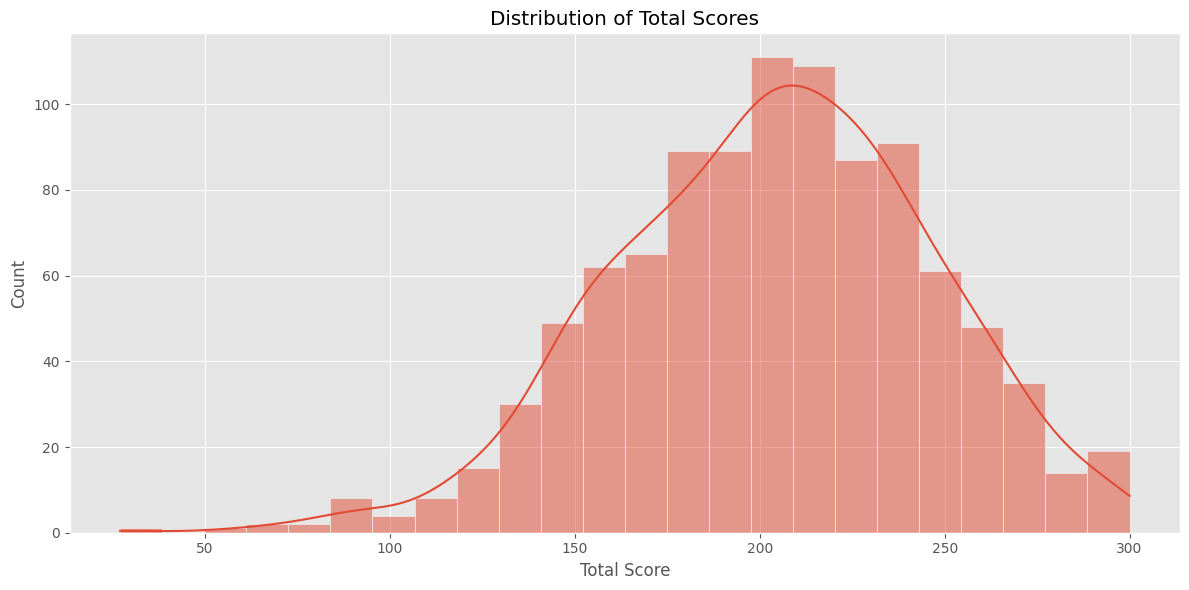

In [48]:
plt.figure(figsize=(12, 6))
sns.histplot(df['total_score'], kde=True)
plt.title('Distribution of Total Scores')
plt.xlabel('Total Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 8. Performance Category Distribution

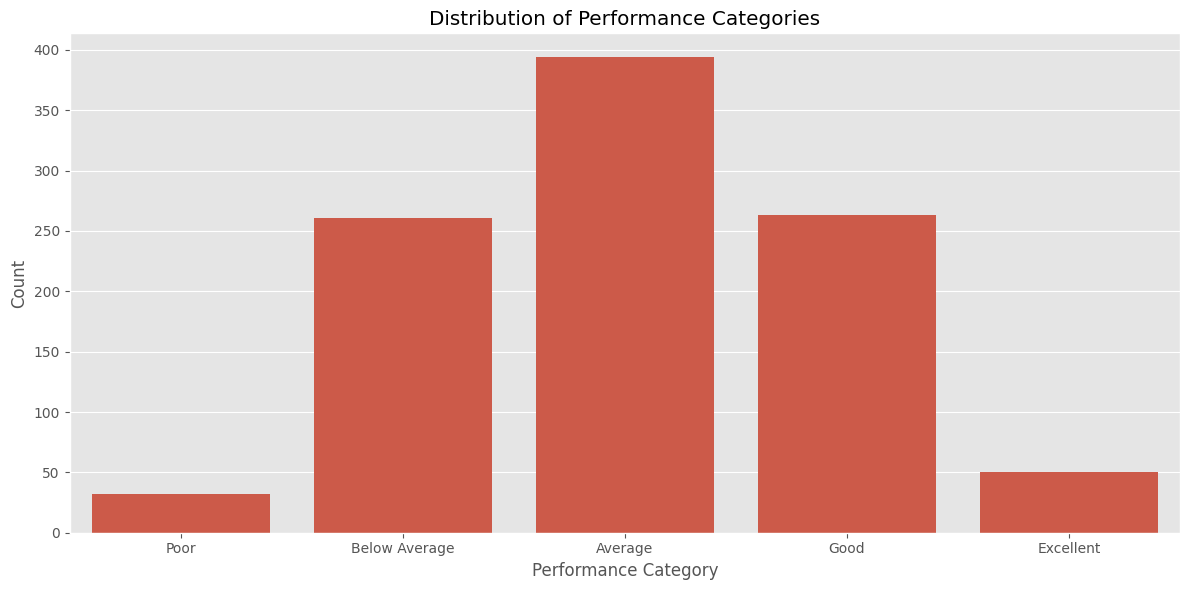

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(x='performance_category', data=df, order=['Poor', 'Below Average', 'Average', 'Good', 'Excellent'])
plt.title('Distribution of Performance Categories')
plt.xlabel('Performance Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Statistical Analyses

### 9. ANOVA: Impact of Parental Education on Average Score

In [50]:
parental_education_groups = [group for _, group in df.groupby('parental level of education')['average_score']]
f_statistic, p_value = stats.f_oneway(*parental_education_groups)
print("\nANOVA Test for Parental Education Impact:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")


ANOVA Test for Parental Education Impact:
F-statistic: 10.753146962336562
p-value: 4.381046480943665e-10


### 10. Chi-square test: Association between Gender and Performance Category

In [51]:
gender_performance_table = pd.crosstab(df['gender'], df['performance_category'])
chi2, p_value, dof, expected = stats.chi2_contingency(gender_performance_table)
print("\nChi-square Test for Gender and Performance Category Association:")
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")


Chi-square Test for Gender and Performance Category Association:
Chi-square statistic: 19.32465038982887
p-value: 0.0006785118074123178


### 11. Multiple Regression: Predicting Math Score

In [52]:
# Prepare the data
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
y = df['math score']

In [56]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), X.columns)
    ])

In [58]:
# Create a pipeline with preprocessor and linear regression
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [59]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [60]:
# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("\nMultiple Regression Results:")
print(f"R-squared score (train): {train_score}")
print(f"R-squared score (test): {test_score}")


Multiple Regression Results:
R-squared score (train): 0.24663333080702265
R-squared score (test): 0.2724878972971143


### 12. Feature Importance for Math Score Prediction

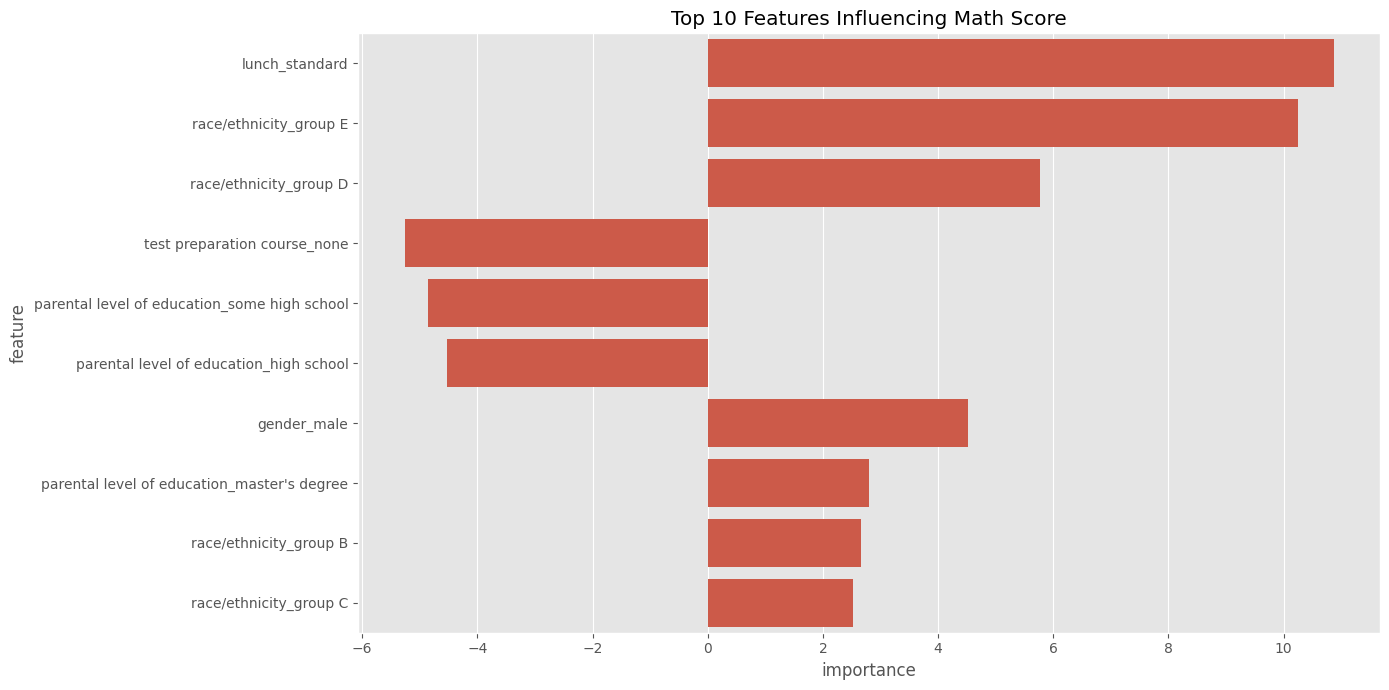

In [61]:
feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(X.columns)
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': model.named_steps['regressor'].coef_
})
feature_importance = feature_importance.sort_values('importance', key=abs, ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Features Influencing Math Score')
plt.tight_layout()
plt.show()

# Conclusions from Student Performance Analysis

After conducting a comprehensive analysis of the student performance dataset, we can draw the following conclusions:

1. **Overall Performance Distribution**
   - The average scores for math, reading, and writing are relatively normally distributed.
   - There's a strong positive correlation between math, reading, and writing scores (correlation coefficients > 0.8).


2. **Gender Differences**
   - Slight differences in performance between genders across subjects were observed.
   - Females tend to score slightly higher in reading and writing, while males score slightly higher in math.


3. **Parental Education Impact**
   - There's a significant relationship between parental education level and student performance (ANOVA p-value: 4.38e-10).
   - Students whose parents have higher education levels tend to perform better.


4. **Test Preparation Impact**
   - Students who completed the test preparation course generally performed better than those who didn't.


5. **Socioeconomic Factors**
   - Students with standard lunch tend to perform better than those with free/reduced lunch, suggesting a potential socioeconomic influence on performance.


6. **Racial/Ethnic Differences**
   - Performance differences were observed across racial/ethnic groups.


7. **High Achievers**
   - 28 students (2.8% of the sample) scored 90 or above in all three subjects.
   - Among high achievers, more students completed the test preparation course (17) than those who didn't (11).
   - Most high achievers had parents with bachelor's degrees (11) or associate's degrees (7).


8. **Low Performers**
   - 285 students (28.5% of the sample) scored below the passing grade of 60 on average.


9. **Predictive Modeling**
   - Our multiple regression model explains about 25-27% of the variance in math scores.
   - This suggests that while the factors considered are significant, there are other important factors not captured in the dataset.


10. **Key Influencing Factors**
    - The top features influencing math scores include parental education levels, test preparation, and certain racial/ethnic groups.


## Recommendations

Based on these findings, we recommend the following actions to improve student performance:

1. **Enhance Test Preparation Programs**: Given the positive impact of test preparation, consider expanding and improving these programs.

2. **Parental Engagement**: Develop programs to increase parental involvement in students' education, especially for parents with lower education levels.

3. **Targeted Support**: Provide additional support for students from lower socioeconomic backgrounds and certain racial/ethnic groups that may be underperforming.

4. **Gender-Specific Strategies**: Implement strategies to address gender gaps in different subjects.

5. **Holistic Approach**: While academic factors are important, the model suggests other factors not captured in this dataset play a role. Consider a more holistic approach to student support, including factors like study habits, motivation, and mental health.

6. **Further Research**: Conduct additional research to identify other factors influencing student performance, as our model explains only about a quarter of the variance in scores.

By implementing these recommendations, we can work towards improving overall student performance and reducing achievement gaps across different demographic groups.

